# 朴素贝叶斯

贝叶斯模型是一种非常简单快速的模型，通常适用于维度非常高的数据集，非常适合为分类问题提供快速粗糙的基本方案。

## 原理：贝叶斯分类

贝叶斯公式:  
$P(L|特征) = \frac{P(特征|L)P(L)}{P(特征)}$  
已知特征下样本属于L的概率，是L 和 特征同时出现的概率除以特征出现的总概率  
剩下的问题就是明确 特征 和 L 的概率分布以及联合概率分布  
特征的联合概率分布通常很难求，此时用到了特征之间独立的观点，这样联合概率分布其实就是各个特征单独出现的乘积，因此被叫做朴素贝叶斯  

## 高斯朴素贝叶斯

假设每个标签的数据都服从简单的高斯分布，此时针对训练数据每个标签下单个特征表现出来的形式，都可以用一个高斯分布去拟合，得到生成式

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

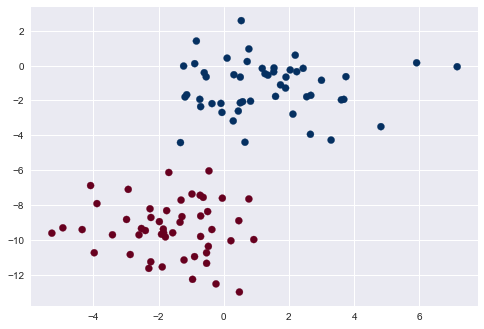

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(100,2,centers=2, random_state=2,cluster_std=1.5)
plt.scatter(X[:,0],X[:,1], c = y,s = 50,cmap = 'RdBu')

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

GaussianNB(priors=None)

In [4]:
# 生成一些新数据来预测标签
rng = np.random.RandomState(0)
Xnew = [-6,-14] + [14,18] * rng.rand(2000,2)
ynew = model.predict(Xnew)

(-5.8992664866054731,
 7.7862788381523007,
 -13.788951516177548,
 3.3764615206977902)

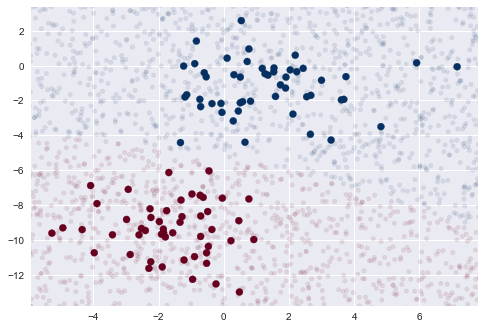

In [5]:
plt.scatter(X[:,0],X[:,1], c = y,s = 50,cmap = 'RdBu')
lim = plt.axis()
plt.scatter(Xnew[:,0],Xnew[:,1], c = ynew,s = 20,cmap = 'RdBu',alpha=0.1)
plt.axis(lim)

通常，高斯贝叶斯的边界是二次方的曲线

In [6]:
# 直接预测概率
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[ 0.89,  0.11],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 1.  ,  0.  ],
       [ 0.  ,  1.  ],
       [ 0.15,  0.85]])

在许多场景尤其是特征比较多的时候，不妨碍高斯朴素贝叶斯成为一种有用的方法。

## 多项式朴素贝叶斯

假设特征是由一个简单多项式分布生成的，多项分布非常适合用于描述出现次数或者出现次数比例的特征。  

### 多项分布
特例：二项分布
* 扔硬币，朝上的概率为p，重复扔n次硬币，出现正面的概率即为一个二项分布概率，记为$X\sim B(n,p)$
多项分布
* 一个特征有M中可能取值，每种可能取值为$p_m$，则在样本量$N_l$下，出现m的次数就是m的多项分布概率
* 通过整体的概率分布，可以求得在该类别下任何$P_m$
在多项式朴素贝叶斯的应用
* 和高斯朴素贝叶斯的区别是：
    * 一个是假设底层符合高斯分布，然后通过整体表征推断高斯分布的均值和方差从而得到全概率分布
    * 一个是假设底层符合多项分布，通过整体表征推断每一种可能结果出现的概率，从而得到全概率分布

In [8]:
# 比较适合就是由某种概率造成值得特征
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
# 为简化过程，只选择四类新闻，下载训练集和测试集
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [10]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [11]:
# 建立管道，将TF-IDF向量化方法与多项式朴素贝叶斯分类器组合在一起
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [12]:
model.fit(train.data,train.target)
labels = model.predict(test.data)

Text(125.71,0.5,'predicted label')

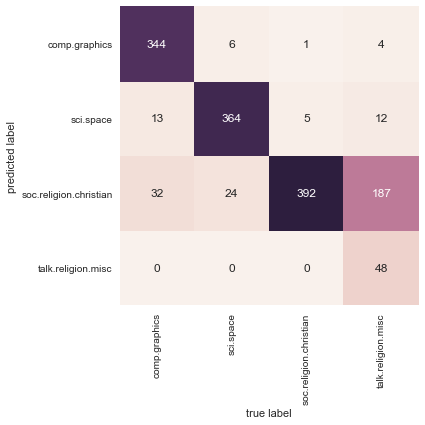

In [13]:
# 用混淆矩阵展现效果
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels = train.target_names, yticklabels = train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

可以看到：宗教新闻和基督教新闻，用简单的该模型没有办法得到较好的区分

In [14]:
def predict_category(s, train = train, model = model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [15]:
predict_category('sending a payload to the ISS')

'sci.space'

In [16]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [17]:
predict_category('determining the screen resolution')

'comp.graphics'

## 朴素贝叶斯的应用场景

由于朴素贝叶斯对数据有严格的假设，因此它的训练效果通常比复杂的模型差，有以下优点：
* 训练和预测的速度非常快
* 直接使用概率预测
* 通常很容易解释
* 可调参数（如果有的话)非常少

适合：
* 假设分布函数与数据匹配
* 各种类型的区分度很高，模型复杂度不重要
* 非常高维度的数据，模型复杂度不重要（事实上随着维度变高，各类型的区分度一般都会变得比较高）